In [56]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
from bs4 import BeautifulSoup

In [101]:
class HTMLTableParser:
    
    def parse_url(self, url):
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'lxml')
        #table_div = soup.find('div' , {'class': 'field__items'})
        a = soup.find_all('table')
        df = self.parse_html_table(a)
        
        print(df)
        return df

    def parse_html_table(self, table):
        #print(table)
        names = []
        marks = []
        for row in table[0].find_all('tr'):
            #print(row)
            td_tags = row.find_all('td')
            name_td = td_tags[0]
            marks_td = td_tags[1]
            names.append(name_td.get_text())
            marks.append(marks_td.get_text())
        
        names = np.array(names[1:], dtype='str')
        marks = np.array(marks[1:], dtype='int')
        df = pd.DataFrame(list(zip(names,marks)))
        df = df.rename(columns={
            0 : 'name',
            1 : 'mark'
        })
        return df
        
hp = HTMLTableParser()
df = hp.parse_url("https://pk.cs.msu.ru/node/297")

                             name  mark
0            АКСОЙ ТЕВФИК ОГУЗХАН    65
1                 АУНГ Е ЕЬИНТ СО    40
2                       АУНГ КО У    45
3                     АУНГ ЧЖО МО    40
4        БОРИСОВ ИВАН ГЕННАДЬЕВИЧ    70
5                      ВАН ЦЗУНЯО     2
6                      ГАО ТЯНЬЮЙ    45
7                    ДУАНЬ ЦИХУЭЙ     2
8                     Е НАЙН АУНГ    40
9      КАПУНИН ИВАН АЛЕКСАНДРОВИЧ    90
10   КОРОЛЕВ АЛЕКСАНДР МИХАЙЛОВИЧ    95
11                      ЛИ ЦЗЯМЭН    90
12                      ЛИ ЦЗЯХЭН    40
13                        ЛИ ЮЕЦИ    70
14                          ЛЮ ГЭ     2
15                      МАЙ СЯОЮЙ     2
16     МАТВЕЕВ АЛЕКСЕЙ ДМИТРИЕВИЧ   100
17      МАТЮХИН ГЕОРГИЙ АНДРЕЕВИЧ    95
18  МИХЕЛЬСОН ГЕРМАН ВЛАДИМИРОВИЧ    95
19                    СЮЕ МЭНДАНЬ    85
20                  ХАН ТАР НАЙНГ    40
21              ХЛАЙНГ БЬВАР АУНГ    45
22                      ЦАЙ ЦИЛУН     2
23                      ЦАЙ ЧУЦЯО    50


In [102]:
df.describe()

,mark
count,37.000000
mean,57.621622
std,30.539002
min,2.000000
25%,40.000000
50%,65.000000
75%,80.000000
max,100.000000


In [103]:
df['mark'].value_counts()

2      6
40     5
75     4
65     3
45     3
70     3
95     3
80     3
90     2
85     2
100    1
50     1
55     1
Name: mark, dtype: int64

In [110]:
df[df.mark <= 65].sort_values('mark', ascending=False).count()-1

name    18
mark    18
dtype: int64

In [113]:
df[df.mark > 65].sort_values('mark', ascending=False).count()

name    18
mark    18
dtype: int64

<Axes: xlabel='mark'>

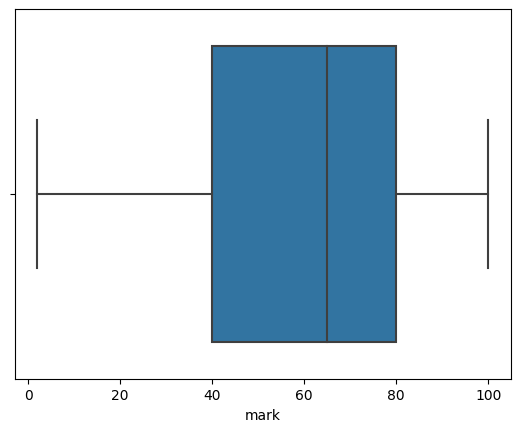

In [115]:
sns.boxplot(x='mark',data=df)